<a href="https://colab.research.google.com/github/treezy254/Data-Science-Prep/blob/master/concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [2]:
import pandas as pd

concrete = pd.read_csv('concrete_data.csv')
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('concrete_compressive_strength', axis=1)
X_valid = df_valid.drop('concrete_compressive_strength', axis=1)
y_train = df_train['concrete_compressive_strength']
y_valid = df_valid['concrete_compressive_strength']

input_shape = [X_train.shape[1]]

Minimum validation loss: 3.5453


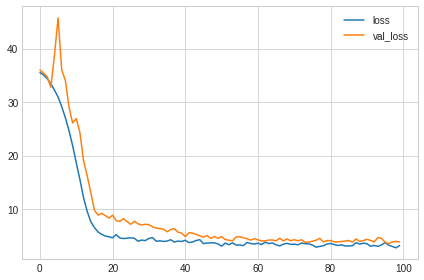

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu' ),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1)
])

model.compile (
    optimizer='adam',
    loss='mae',
    metrics = ['mae'],
)

EPOCHS = 100

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

Minimum validation loss: 4.4624


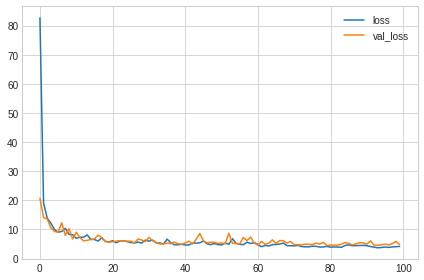

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu' ),
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    # layers.BatchNormalization(),
    layers.Dense(units=1)
])

model.compile (
    optimizer='adam',
    loss='mae',
    metrics = ['mae'],
)

EPOCHS = 100

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

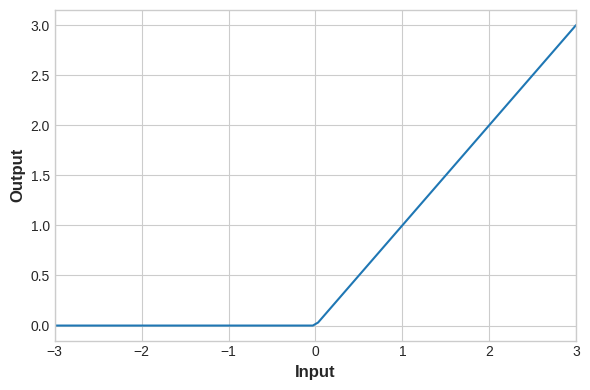

In [13]:
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()